## Dependencies

In [1]:
# Filepaths, Python Imaging,, numpy and pandas 
import os
from PIL import Image
import numpy as np
import pandas as pd

In [2]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

### Load the Plant Disease dataset from local desktop

In [3]:
base_dir = r'ENTER_YOUR_FILE_PATH_HERE'

# Collect all images & preprocessing

In [4]:
# Expanding for loop to gather all images from all directories
def load_images_from_subfolders(base_folder):
    images = []
    labels = []

    for root, dirs, files in os.walk(base_folder):
        folder_name = os.path.basename(root)
        if folder_name.startswith('Tomato'):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(root, file)
                    #print(f"Loading {img_path}")
                    try:
                        img = Image.open(img_path).convert('RGB')
                        img = img.resize((28, 28))
                        images.append(np.array(img))
                        labels.append(folder_name) 
                    except Exception as e:
                        print(f"Error loading image {img_path}: {e}")

    return np.array(images), np.array(labels)

all_images, labels = load_images_from_subfolders(base_dir)
print(f'Total number of images: {all_images.shape[0]}')

Total number of images: 32022


In [7]:
# Normalizing all images using fit_transform
n_samples, height, width, n_channels = all_images.shape
flattened_images = all_images.reshape((n_samples, -1))

scaler = MinMaxScaler()
flattened_images_scaled = scaler.fit_transform(flattened_images)

# Create dataframe from scaled and flattened images
df_scaled_images = pd.DataFrame(flattened_images_scaled)

# Add Label (i.e. Category) to the dataframe
df_scaled_images['label'] = labels

# Save dataframe to CSV locally due to size
file_path = r'ENTER_YOUR_FILE_PATH_HERE'
df_scaled_images.to_csv(file_path, index=False)

# Review normalized images

In [13]:
# Review the dataframe
df_scaled_images.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,0.613821,0.582329,0.584677,0.608871,0.575397,0.577689,0.610442,0.577075,0.579365,0.604839,...,0.452756,0.423529,0.438735,0.448819,0.425197,0.434783,0.454902,0.431373,0.440945,Tomato_Bacterial_spot
1,0.491870,0.445783,0.443548,0.483871,0.436508,0.434263,0.489960,0.442688,0.440476,0.500000,...,0.649606,0.639216,0.648221,0.657480,0.649606,0.656126,0.654902,0.647059,0.653543,Tomato_Bacterial_spot
2,0.479675,0.457831,0.447581,0.479839,0.456349,0.446215,0.469880,0.446640,0.436508,0.471774,...,0.637795,0.643137,0.644269,0.641732,0.645669,0.652174,0.615686,0.619608,0.629921,Tomato_Bacterial_spot
3,0.650407,0.634538,0.641129,0.649194,0.630952,0.637450,0.634538,0.616601,0.623016,0.625000,...,0.515748,0.498039,0.498024,0.500000,0.484252,0.486166,0.494118,0.478431,0.476378,Tomato_Bacterial_spot
4,0.682927,0.650602,0.653226,0.673387,0.638889,0.645418,0.670683,0.636364,0.646825,0.669355,...,0.456693,0.400000,0.403162,0.444882,0.393701,0.395257,0.458824,0.411765,0.413386,Tomato_Bacterial_spot


In [14]:
# Review the shape of the images
df_scaled_images.shape

(32022, 2353)

In [15]:
# Review unique labels
df_scaled_images['label'].unique().tolist()

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [16]:
label_count = df_scaled_images['label'].value_counts().sort_values(ascending=True)
label_count

label
Tomato__Tomato_mosaic_virus                     746
Tomato_Leaf_Mold                               1904
Tomato_Early_blight                            2000
Tomato__Target_Spot                            2808
Tomato_healthy                                 3182
Tomato_Spider_mites_Two_spotted_spider_mite    3352
Tomato_Septoria_leaf_spot                      3542
Tomato_Late_blight                             3818
Tomato_Bacterial_spot                          4254
Tomato__Tomato_YellowLeaf__Curl_Virus          6416
Name: count, dtype: int64

# Visualize images by disease

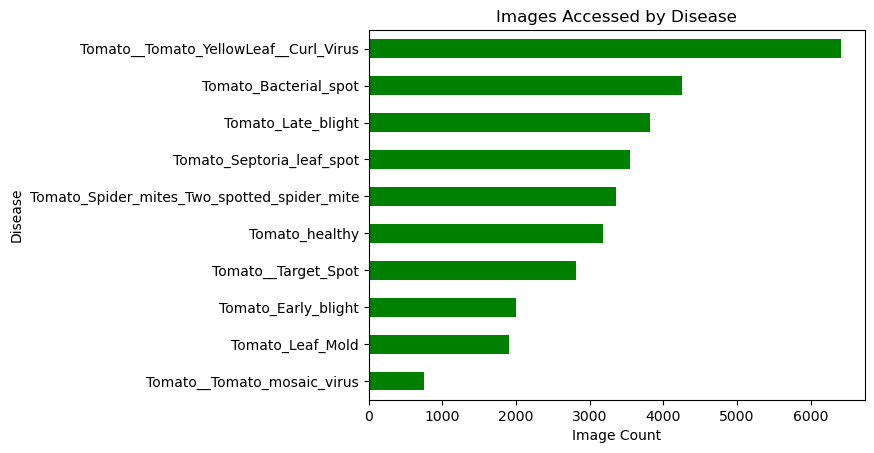

In [17]:
import matplotlib.pyplot as plt
label_count.plot(kind='barh', color='green')
plt.title('Images Accessed by Disease')
plt.xlabel('Image Count')
plt.ylabel('Disease')
plt.savefig('..\Output\images_accessed_by_disease.png',  dpi=300, bbox_inches='tight')
plt.show()